# Discrete Fourier Transform

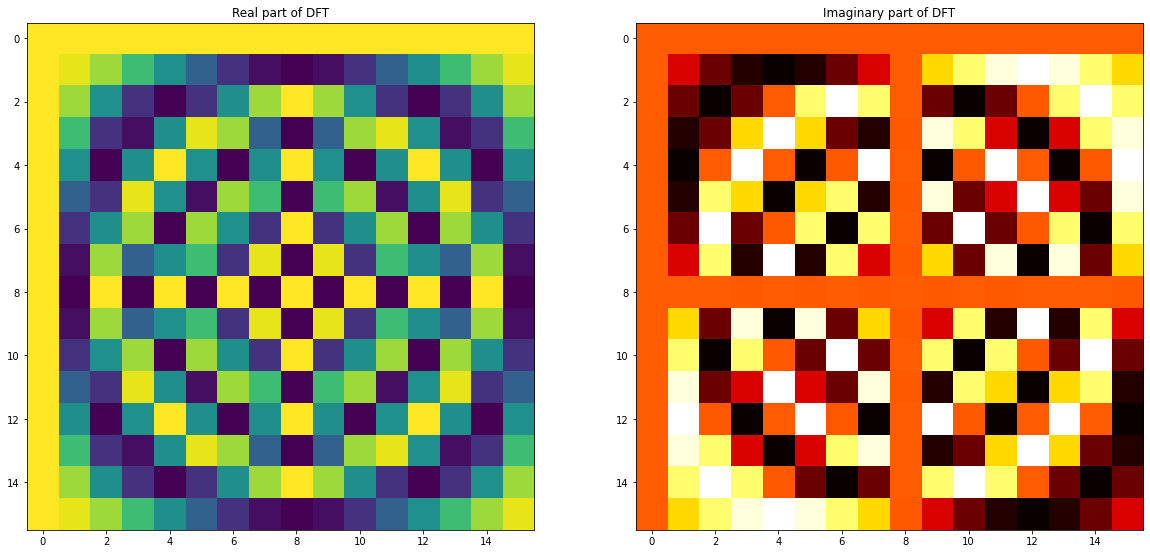

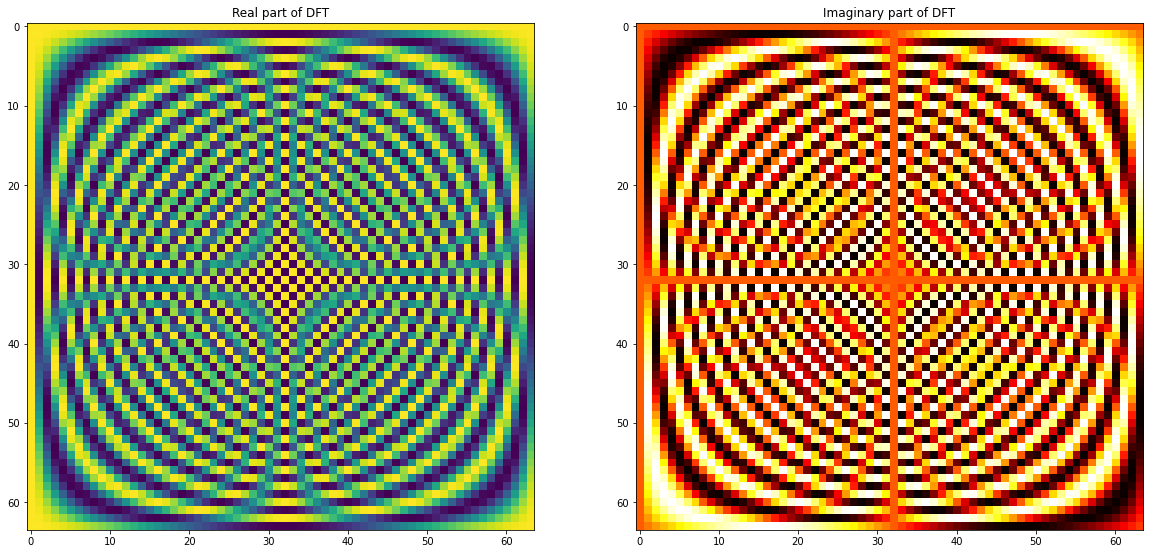

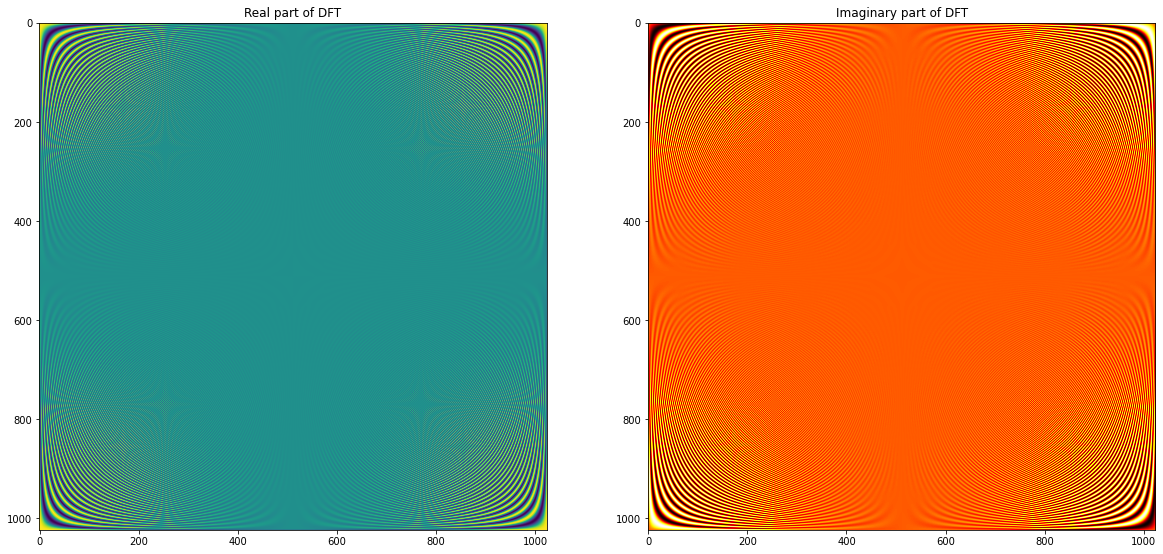

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def dft_matrix(N):
    n=np.arange(N)
    k=n.reshape((N,1))
    W=np.exp(-2j*np.pi*k*n/N)
    return W

N_values=[16,64,1024]
for N in N_values:
    Vn=dft_matrix(N)
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.title("Real part of DFT")
    plt.imshow(np.real(Vn),cmap='viridis')
    plt.subplot(1,2,2)
    plt.title("Imaginary part of DFT")
    plt.imshow(np.imag(Vn),cmap='hot')
    plt.show()
    

Each row of the dft matrix, if we look carefully (Look at N=16 plot) is a cosine wave(in case of real part) or sine wave (in case of imaginary part), with the frequency increasing as we go from one row to the next. In other words we can say by multiplying a signal with DFT matrix, we are correlating the signal with these sinusoids on each row of the DFT matrix

# DFT of random signals

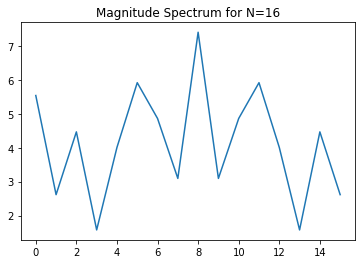

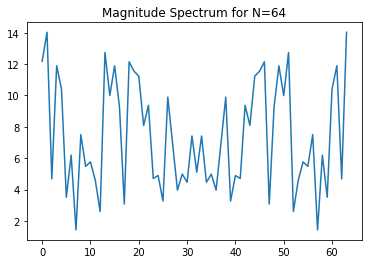

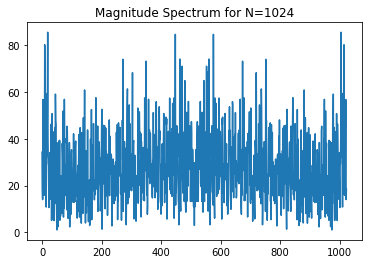

In [2]:
N_values=[16,64,1024]
for N in N_values:
    Wnk=dft_matrix(N)
    x=np.random.randn(N)
    X=np.dot(Wnk,x)
    plt.plot(np.abs(X))
    plt.title("Magnitude Spectrum for N={}".format(N))
    plt.show()

We can see that we are getting mostly a white signal. Especially with regards to the last plot above, each frequency component has an amplitude of approx 30

# DFT vs FFT computation time as function of N

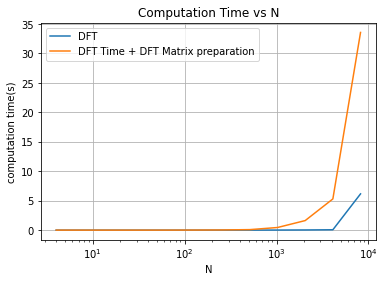

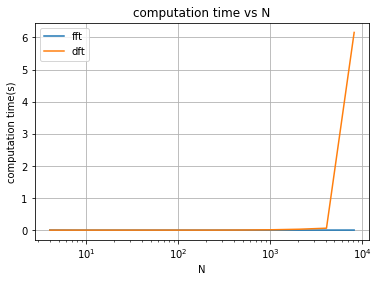

In [3]:
#DFT computation time as function of N
import time
gamma_values=np.arange(2,14)
N_values = 2**gamma_values
time_with_dft_mat_computation = []
time_results=[]
for N in N_values:
    x=np.random.randn(N)
    
    #Timed section
    prepare_time = time.time()
    Vn=dft_matrix(N)
    start_time=time.time()
    X=np.dot(Vn,x)
    end_time=time.time()
    
    computation_time=end_time-start_time
    time_results.append(computation_time)
    full_computation_time = end_time-prepare_time
    time_with_dft_mat_computation.append(full_computation_time)
    
#print(time_results)
#print(time_with_dft_mat_computation)

plt.semilogx(N_values, time_results, N_values, time_with_dft_mat_computation)
plt.xlabel('N')
plt.ylabel('computation time(s)')
plt.title('Computation Time vs N')
plt.legend(['DFT', 'DFT Time + DFT Matrix preparation'])
plt.grid()
plt.show()

from numpy.fft import fft
fft_time_results=[]
for N in N_values:
    x=np.random.randn(N)
    
    #Timed Section
    start_time=time.time()
    X=fft(x)
    end_time=time.time()
    
    computation_time=end_time-start_time
    fft_time_results.append(computation_time)
plt.semilogx(N_values,fft_time_results, N_values, time_results)
plt.xlabel('N')
plt.ylabel('computation time(s)')
plt.title('computation time vs N')
plt.legend(['fft', 'dft'])
plt.grid()
plt.show()

We can see the Computation time for DFT rises as O(n2) whereas that of FFT rises much slower O(nlogn). If we include time for DFT matrix computation it is worse. So if we have to use DFT, we should pre-compute the DFT matrix; and do just the dot product for each of the new signal segments.

# Circular Convolution
Objective: We will perform

    * first principles circular convolution (The textbook definition of circular convolution by repeated circular shift and multiply)
    * multiplication in spectral domain, which is theoretically equivalent to circular convolution
    * check equivalence of the above two results manually for multiple x and h values

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def cconv_first_principles(x,h):
    Nx = len(x)
    Nh = len(h)
    N = max(Nx, Nh)
    x=np.pad(x,(0,N-Nx)) #Zero pad
    h=np.pad(h,(0,N-Nh)) #Zero pad
    x_reversed = x[::-1]
    x_mat=[] #List of numpy arrays
    #Create a matrix of reversed x circularly shifted by one position in each row.
    for i in range(0,N):
        x_reversed=np.roll(x_reversed,1)
        x_mat.append(x_reversed)
    x_mat=np.array(x_mat) # List of array -> matrix
    #print(x_mat)
    return np.dot(x_mat,h)


def cconv_fft(x,h):
    Nx = len(x)
    Nh = len(h)
    N = max(Nx, Nh)
    x=np.pad(x,(0,N-Nx)) #Zero pad
    h=np.pad(h,(0,N-Nh)) #Zero pad
    return np.real(np.fft.ifft(np.fft.fft(x) * np.fft.fft(h)))

x=[1,2,3,4]
h=[1,2]
x = np.random.randn(8)
h = np.random.randn(8)

#Circular convolution from first principles
y_first = cconv_first_principles(x,h)
print(y_first)

#Circular convolution using multiplication in transform domain
y_fft = cconv_fft(x,h)
print(y_fft)

[ 3.10574493 -0.5134005  -3.29921925 -0.05165618  0.99570475  2.69699951
 -1.18755621 -1.88410112]
[ 3.10574493 -0.5134005  -3.29921925 -0.05165618  0.99570475  2.69699951
 -1.18755621 -1.88410112]


# Parseval's Theorem

In [5]:
N=4096
x1 = np.random.randn(N) + 1j*np.random.randn(N)
x2 = np.random.randn(N) + 1j*np.random.randn(N)
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
time_domain = np.sum(x1*np.conjugate(x2))
freq_domain = np.sum(X1*np.conjugate(X2))/(N)
print(time_domain, freq_domain)

(-32.777539788380444-76.72348175866892j) (-32.77753978838049-76.72348175866894j)
